<a href="https://colab.research.google.com/github/LuisANgelMancilla/GenomicaComputacional/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2
## Carolina Caballero Cordero
## Luis Angel Mancilla Galván



## **Alineamientos globales**
### 1. Alineamientos 
  **a) g1 = CTTAGA y g2 = GTAA**
 

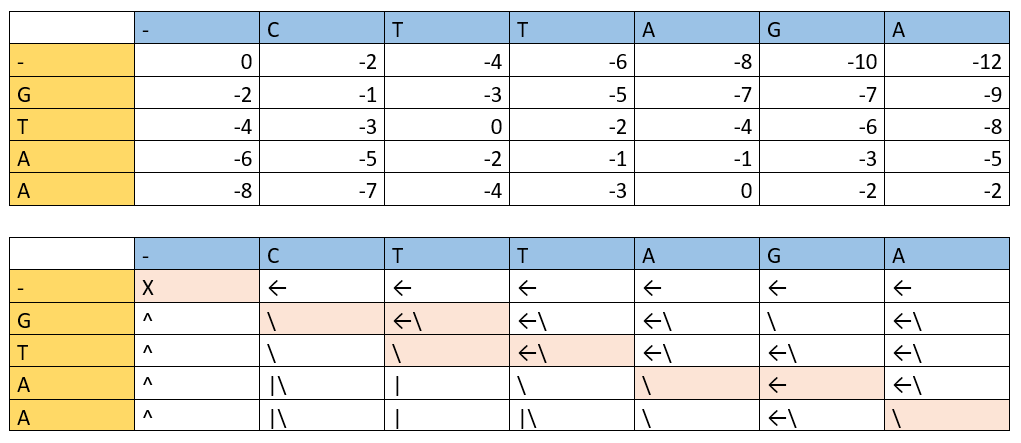

| C | T | T | A | G | A |
|-- |---- |--- |--- |--- |--- |
| G | T | - | A | - | A | 

| C | T | T | A | G | A |
|-- |---- |--- |--- |--- |--- |
| G | - | T | A | - | A | 



**b) g1 = ACCCTACCT y g2 = AGCCTCT** 

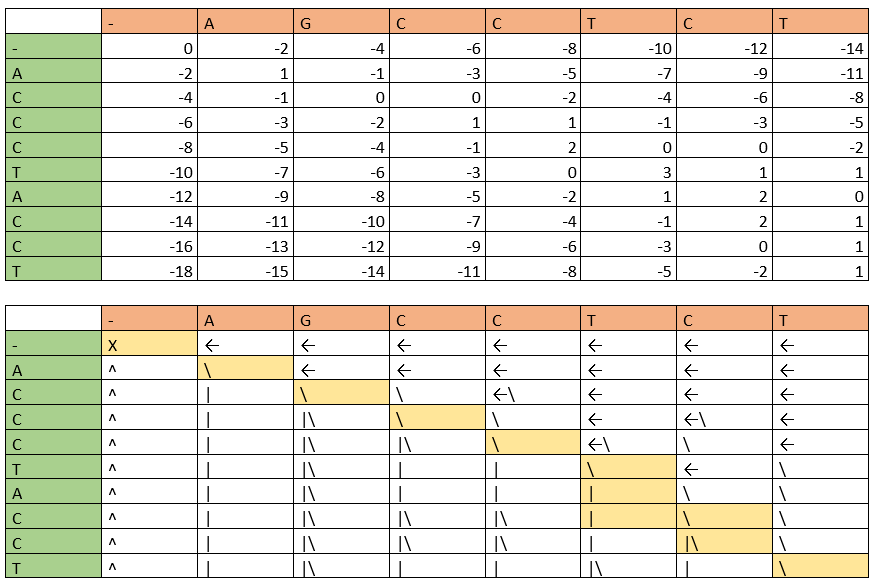

| A | G | C | C | T | - | - | C | T |
|-- |--- |--- |--- |--- |--- |---|---|--- |
| A | C | C | C | T | A | C | C | T |

| A | G | C | C | T | - | C | - | T |
|-- |--- |--- |--- |--- |--- |---|---|--- |
| A | C | C | C | T | A | C | C | T |

### 2. Algoritmo con base en la mátriz *B* de *Needleman-Wunsch*

In [ ]:
import numpy as np
from pprint import pprint

In [ ]:
mu    = -1  #mismatch
eps   =  1  #match
sigma = -2  #gap

def delta(u,v,msm=mu,mth=eps):
    if(u==v):
        return mth
    else:
        return msm

In [ ]:
def entrada(S,i,j,V,U,mu=mu, eps=eps,sigma=sigma,delta=delta):
    arriba    = S[i-1,  j] + sigma
    izquierda = S[i  ,j-1] + sigma
    u,v       = V[i-1], U[j-1]
    valdelta  = delta(u,v, msm=mu, mth=eps)
    match     = S[i-1,j-1] + valdelta
    ## entrada de la matriz
    l         = [arriba, izquierda, match]
    ## valor de donde viene el maximo
    mx        = max(l)
    cod       = sum([(i+1) for i in range(len(l)) if l[i]==mx])
    return max(l), cod

In [ ]:
V = 'ACCCTACCT'     
U = 'AGCCTCT'   
S = np.zeros((len(V)+1,len(U)+1))
B = np.zeros_like(S)
pprint(S)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])


In [ ]:
for i in range(1,len(V)+1):
    S[i,0] = S[i-1,0] + sigma
for j in range(1,len(U)+1):
    S[0,j] = S[0,j-1] + sigma
pprint(S)

array([[  0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14.],
       [ -2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [-10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [-12.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [-14.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [-16.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [-18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])


In [ ]:
for i in range(1,len(V)+1):
    for j in range(1,len(U)+1):
        S[i,j], B[i,j] = entrada(S,i,j,V,U)

In [ ]:
pprint (S)

array([[  0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14.],
       [ -2.,   1.,  -1.,  -3.,  -5.,  -7.,  -9., -11.],
       [ -4.,  -1.,   0.,   0.,  -2.,  -4.,  -6.,  -8.],
       [ -6.,  -3.,  -2.,   1.,   1.,  -1.,  -3.,  -5.],
       [ -8.,  -5.,  -4.,  -1.,   2.,   0.,   0.,  -2.],
       [-10.,  -7.,  -6.,  -3.,   0.,   3.,   1.,   1.],
       [-12.,  -9.,  -8.,  -5.,  -2.,   1.,   2.,   0.],
       [-14., -11., -10.,  -7.,  -4.,  -1.,   2.,   1.],
       [-16., -13., -12.,  -9.,  -6.,  -3.,   0.,   1.],
       [-18., -15., -14., -11.,  -8.,  -5.,  -2.,   1.]])


In [ ]:
pprint (B)


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 2., 2., 2., 2., 2., 2.],
       [0., 1., 3., 3., 5., 2., 5., 2.],
       [0., 1., 4., 3., 3., 2., 5., 2.],
       [0., 1., 4., 4., 3., 5., 3., 2.],
       [0., 1., 4., 1., 1., 3., 2., 3.],
       [0., 4., 4., 1., 1., 1., 3., 5.],
       [0., 1., 4., 4., 4., 1., 3., 3.],
       [0., 1., 4., 4., 4., 1., 4., 3.],
       [0., 1., 4., 1., 1., 4., 1., 3.]])


## **Alineamientos locales**
### 3. Alineamiento usando el algoritmo de *Smith-Waterman*
**g1 = AGCGTAG y g2=CTCGTG.**

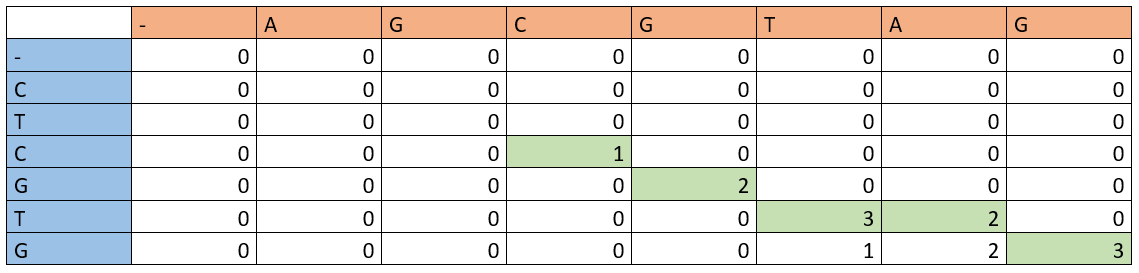

| C | G | T | A | G |
|---|---|---|---|---|
| C | G | T |...| G |

## **Gráficas de Brujin**
### Con base en los reads ***AAGA, AGAC, GACT, ACTT, CTTT, ACTG, ACTC, CTCC, CTGC, CGAC, GACT, CGAC, TGCG, TCCG, GCGA, CCGA, GACT***

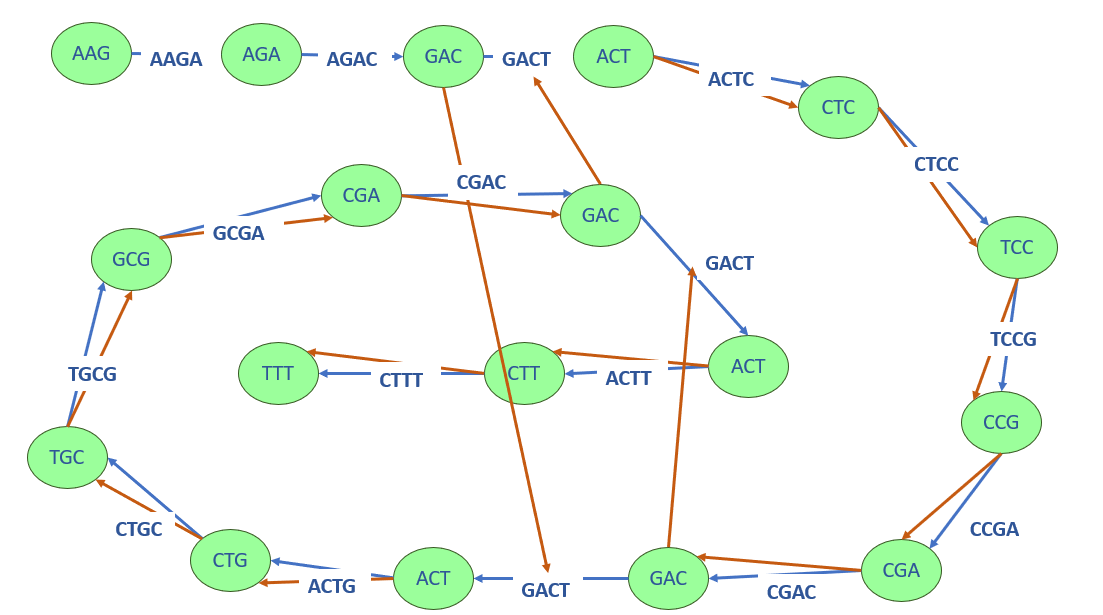

**Resultado de la cadena**



> ## AAGACTCCGACTGCGACTTT


> ## AAGACTGCGACTCCGACTTT








### Ejercicio 5. a)

Programa para calcular entropía de una secuencia de datos binarios [0,1]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import math
import collections

# ingnorar mensajes de advertencias en el notebook
warnings.filterwarnings('ignore')

# graficos en el notebook
%matplotlib inline

m1='001011110101011110000000101011'
len(m1)
m2='100101100111101110111011100111'
len(m2)
m3='000000000000000000000000000000'
len(m3)

30

In [2]:
tamaño=len (m1)
print(tamaño)
print(collections.Counter(m1))

30
Counter({'0': 15, '1': 15})


El tamaño de la cadena es de 30 y las veces que aparece 1 son 15 y de 0 son 15.
A continuación se calcula la entropía usando la fórmula de Shannon

In [4]:
P=np.array([15/30,15/30])
log2P=np.log2(P)
Result1=P.dot(-log2P)

In [5]:
tamaño=len (m2)
print(tamaño)
print(collections.Counter(m2))

30
Counter({'1': 20, '0': 10})


El tamaño de la cadena es de 30 y las veces que aparece 1 son 20 y de 0 son 10.
A continuación se calcula la entropía usando la formula de Shannon

In [6]:
P=np.array([20/30,10/30])
log2P=np.log2(P)
Result2=P.dot(-log2P)

In [7]:
tamaño=len (m3)
print(tamaño)
print(collections.Counter(m3))

30
Counter({'0': 30})


El tamaño de la cadena es de 30 y las veces que aparece 1 son 0 y de 0 son 30.
A continuación se calcula la entropía usando la fórmula de Shannon

In [8]:
P=np.array([30/30])
log2P=np.log2(P)
Result3=P.dot(-log2P)

Los resultados de las cadenas son:

In [9]:
print('Resultado cadena 1: ',Result1,'\nResultado cadena 2: ',Result2,'\nResultado cadena 3: ',Result3)

Resultado cadena 1:  1.0 
Resultado cadena 2:  0.9182958340544896 
Resultado cadena 3:  -0.0


#### Ejercicio 5. b)


In [10]:
g='ACCCTCGGCGTC'
len (g)

12

Para A=1/12, C=6/12 G=3/12 T=2/12

In [11]:
# Probabilidades totales de cada letra
A=1/12 
C=6/12 
G=3/12 
T=2/12
# Calculo entropia de Shannon para cada letra.
a=-(A)*math.log2(A)
print (a)
c=-(C)*math.log2(C)
print (c)
g=-(G)*math.log2(G)
print (g)
t=-(T)*math.log2(T)
print (t)
#Suma de entropía de cada letra
suma=a+c+t+g
print("Resultado es: ")
print(suma)

0.29874687506009634
0.5
0.5
0.430827083453526
Resultado es: 
1.7295739585136223


Con el valor de 1.729 aproximado a 2, se puede determinar que se necesitan de 2 bits para determinar A=00, C=01, G=10 y T=11.

#### Ejercicio 5. c)
Definimos un metodo para generar la entropía de Shannon

In [12]:
# ingnorar mensajes de advertencias en el notebook
warnings.filterwarnings('ignore')

# graficos en el notebook
%matplotlib inline

def entropia_prob_pq(x):
    """Devuelve la entropia de una probabilidad de dos posibilidades"""
    """X es la probabilidad p, se usa tres por que equivale a un bit"""
    return round((-x * np.log2(x)) + (-(1 - x ) * np.log2((1 - x))), 3)

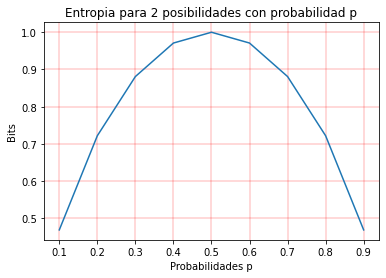

In [13]:
# Graficando la entropia en el caso de 2 posibilidades con
# probabilidad p y (1- p)

# vectorizar la función para poder pasarle un vector de parámetro
vent = np.vectorize(entropia_prob_pq)
# establece el espacio entre 0 y 1 de probabilidades en el eje de las x
X = np.linspace(0, 1, 11)

plt.plot(X, vent(X))
plt.title("Entropia para 2 posibilidades con probabilidad p")
plt.grid(color='r', linestyle='-', linewidth=.3)
plt.xlabel('Probabilidades p')
plt.ylabel('Bits')
plt.show()

Es la probabilidad de que pase o no pase, en este la entropía máxima está determinada por 1 bit, que puede tomar el valor de 0 a 1, alcanza ese máximo de entropía al tener una incertidumbre alta, esto ocurre en 0.5.